# **Introduction**

In this assignment, you will work with a dataset that includes The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. The target variable of interest in this dataset is the median value of owner-occupied homes (MEDV), which serves as a proxy for the house prices.
First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. By incorporating these regularization techniques, you aim to improve the generalization performance of your regression models and obtain more robust predictions of house prices in the Boston area.

## Imports

In [1]:
import os
import pandas
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

!wget -O /HousingData.csv "https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0"

--2024-04-12 14:42:33--  https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7cef60c00b6b2628b38a8678c4.dl.dropboxusercontent.com/cd/0/inline/CQ5UAOrng271WOZq9unk-j5xRiz5II8Xce49BbPzBl4YgOkSGpvIbjCBdfhYF3nasGPCbbAe9D3xH3YWjc2I_UlshNr1fc4ELKsox8OVAi4f-N9Slwpsm-G9kPEJeLvbxc43usxu5WorlGxRd8HqXwBW/file# [following]
--2024-04-12 14:42:33--  https://uc7cef60c00b6b2628b38a8678c4.dl.dropboxusercontent.com/cd/0/inline/CQ5UAOrng271WOZq9unk-j5xRiz5II8Xce49BbPzBl4YgOkSGpvIbjCBdfhYF3nasGPCbbAe9D3xH3YWjc2I_UlshNr1fc4ELKsox8OVAi4f-N9Slwpsm-G9kPEJeLvbxc43usxu5WorlGxRd8HqXwBW/file
Resolving uc7cef60c00b6b2628b38a8678c4.dl.dropboxusercontent.com (uc7cef60c00b6b2628b38a8678c4.dl.dropboxusercontent.com)... 162.125.6.15, 2620:1

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe and then check for missing values and impute missing values with mean

In [2]:
file_path = '/HousingData.csv'
# TODO: Load the Dataset and Check for mising values and then impute them with the mean value
df = pd.read_csv(file_path)
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  222     18.7   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  


In [3]:
missing_values = df.isnull().sum()
print("missing values:\n", missing_values)

missing values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [5]:
df.fillna(df.mean(), inplace=True)
missing_values_after_imputation = df.isnull().sum()
print("missing values after imputation:\n", missing_values_after_imputation)

missing values after imputation:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Get a brief description of the dataset

In [6]:
# TODO: you can use .info() and .description()
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB
None


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


Extract only the features from the dataframe by removing the target column and then Convert the new dataframe into a numpy array
</br>
Note: **Do not remove the previous dataframe.**


# Preprocessing

In [7]:
# TODO: drop MEDV and convert to numpy array
new_df = df.drop(columns=['MEDV'])
df_np_array = new_df.values
df_np_array[:5]

array([[6.32000000e-03, 1.80000000e+01, 2.31000000e+00, 0.00000000e+00,
        5.38000000e-01, 6.57500000e+00, 6.52000000e+01, 4.09000000e+00,
        2.96000000e+02, 1.53000000e+01, 3.96900000e+02, 4.98000000e+00],
       [2.73100000e-02, 0.00000000e+00, 7.07000000e+00, 0.00000000e+00,
        4.69000000e-01, 6.42100000e+00, 7.89000000e+01, 4.96710000e+00,
        2.42000000e+02, 1.78000000e+01, 3.96900000e+02, 9.14000000e+00],
       [2.72900000e-02, 0.00000000e+00, 7.07000000e+00, 0.00000000e+00,
        4.69000000e-01, 7.18500000e+00, 6.11000000e+01, 4.96710000e+00,
        2.42000000e+02, 1.78000000e+01, 3.92830000e+02, 4.03000000e+00],
       [3.23700000e-02, 0.00000000e+00, 2.18000000e+00, 0.00000000e+00,
        4.58000000e-01, 6.99800000e+00, 4.58000000e+01, 6.06220000e+00,
        2.22000000e+02, 1.87000000e+01, 3.94630000e+02, 2.94000000e+00],
       [6.90500000e-02, 0.00000000e+00, 2.18000000e+00, 0.00000000e+00,
        4.58000000e-01, 7.14700000e+00, 5.42000000e+01, 6.06

look for outliers using box plot and if There are some outliers in data, use StandardScaler can help in scaling data.



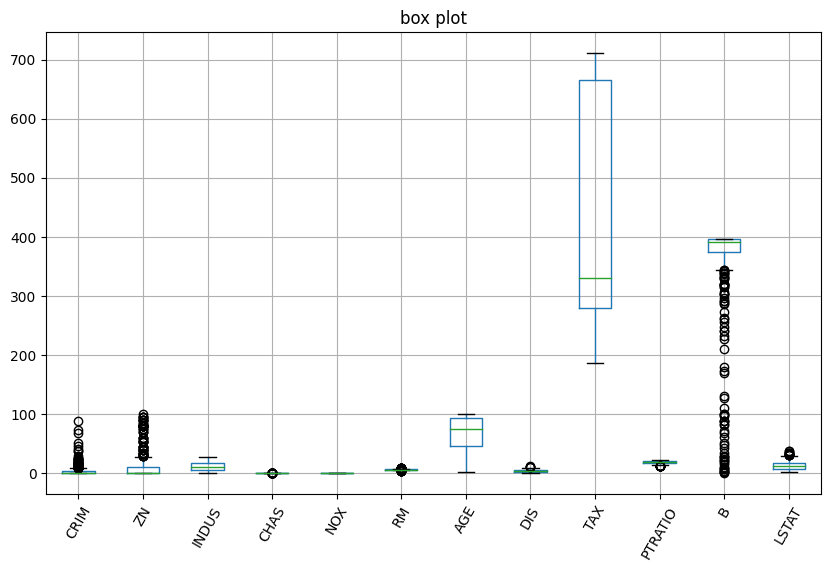

In [8]:
plt.figure(figsize=(10, 6))
new_df.boxplot()
plt.title("box plot")
plt.xticks(rotation=60)
plt.show()

In [9]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

columns = ['CRIM', 'INDUS', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
outlier_columns = []
for column in columns:
    outliers = detect_outliers_iqr(df, column)
    if not outliers.empty:
        outlier_columns.append(column)
        # print("Outliers detected in column:", column)
        # print(outliers)
    else:
        print("no outliers detected in column:", column)

no outliers detected in column: INDUS
no outliers detected in column: NOX
no outliers detected in column: AGE
no outliers detected in column: TAX


In [10]:
outlier_columns

['CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

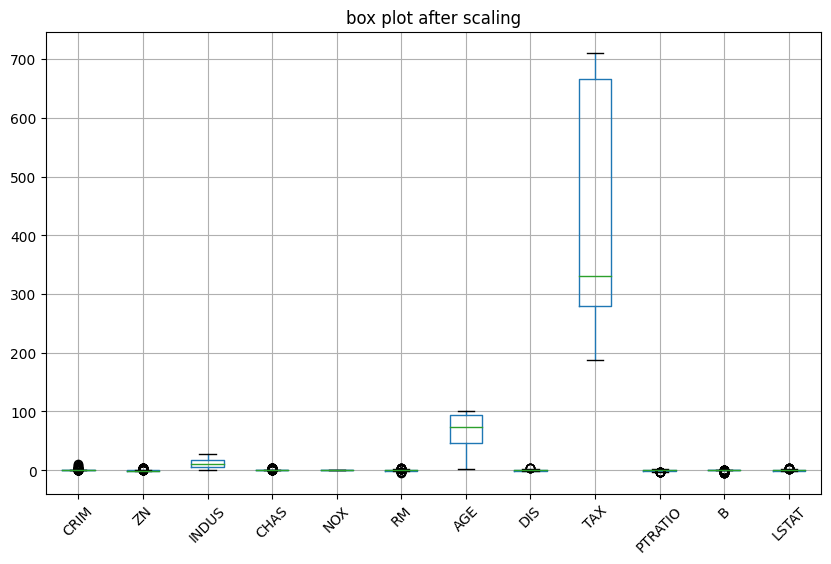

In [12]:
scaler = StandardScaler()
new_df[outlier_columns] = scaler.fit_transform(new_df[outlier_columns])
plt.figure(figsize=(10, 6))
new_df.boxplot()
plt.title("box plot after scaling")
plt.xticks(rotation=45)
plt.show()

add polynomial features to increase model complexity!



In [98]:
df_np_array = new_df.values
poly_features = PolynomialFeatures(include_bias=False)
poly_features.fit(df_np_array)
X_poly = poly_features.transform(df_np_array)

Extract the target column from the previously mentioned DataFrame and transform it into a new NumPy array, named y.

In [99]:
# TODO: extract the MEDV
target_column = 'MEDV'
y = df[target_column].values
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])



Split the dataset into two parts such that the training set contains 80% of the samples.

In [100]:
X_poly.shape

(506, 90)

In [101]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (404, 90)
Shape of X_test: (102, 90)
Shape of y_train: (404,)
Shape of y_test: (102,)


# Training


Fit a linear regressor to the data. (Use sklearn)


In [102]:
# TODO: Use sklearn
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

print("coefficients:", linear_regressor.coef_)
print("intercept:", linear_regressor.intercept_)

coefficients: [ 1.35243643e+01  4.86996692e+00 -5.04319594e-01  2.04017682e+00
 -2.16078196e+01  1.33835645e+01 -1.42393096e-01 -1.73703838e+01
 -4.39543791e-02 -1.92480557e-01  6.41518523e+00  3.98591315e+00
  1.88815533e-01 -2.12293611e+00  4.88904927e-01  2.99592944e+00
 -2.01777376e+01  3.47631370e-01  7.61488568e-03  2.21883471e+00
 -1.38576797e-02 -2.04447912e+00  7.41756804e-03  1.19322150e+00
 -8.41126027e-02  1.51490889e-02  2.74709658e-01 -2.40163796e+01
 -1.52798130e-01  2.77826835e-02 -1.08630659e+00  1.76470872e-02
 -2.68640233e-01 -3.02213841e+00 -1.60704564e+00  2.93192306e-02
 -4.64717644e-02 -6.58532643e-01  1.91634896e-01  7.23919775e-03
  2.06506665e-01 -5.77644405e-04 -1.58506290e-01  1.15385966e-01
 -7.56590171e-02  1.37177961e+00 -9.41142401e+00 -9.50138209e-01
 -1.62495179e-02 -1.69626905e+00  3.24972697e-03 -1.88581634e-01
  6.91851939e-03 -4.71226094e-01 -2.82939696e+01 -1.07195977e+01
  1.18720626e-01  3.13924559e+01  1.00389418e-01 -1.79356090e+01
 -4.2119092

Get the coefficients of the variables and visualize it

[ 1.35243643e+01  4.86996692e+00 -5.04319594e-01  2.04017682e+00
 -2.16078196e+01  1.33835645e+01 -1.42393096e-01 -1.73703838e+01
 -4.39543791e-02 -1.92480557e-01  6.41518523e+00  3.98591315e+00
  1.88815533e-01 -2.12293611e+00  4.88904927e-01  2.99592944e+00
 -2.01777376e+01  3.47631370e-01  7.61488568e-03  2.21883471e+00
 -1.38576797e-02 -2.04447912e+00  7.41756804e-03  1.19322150e+00
 -8.41126027e-02  1.51490889e-02  2.74709658e-01 -2.40163796e+01
 -1.52798130e-01  2.77826835e-02 -1.08630659e+00  1.76470872e-02
 -2.68640233e-01 -3.02213841e+00 -1.60704564e+00  2.93192306e-02
 -4.64717644e-02 -6.58532643e-01  1.91634896e-01  7.23919775e-03
  2.06506665e-01 -5.77644405e-04 -1.58506290e-01  1.15385966e-01
 -7.56590171e-02  1.37177961e+00 -9.41142401e+00 -9.50138209e-01
 -1.62495179e-02 -1.69626905e+00  3.24972697e-03 -1.88581634e-01
  6.91851939e-03 -4.71226094e-01 -2.82939696e+01 -1.07195977e+01
  1.18720626e-01  3.13924559e+01  1.00389418e-01 -1.79356090e+01
 -4.21190928e+00  4.60555

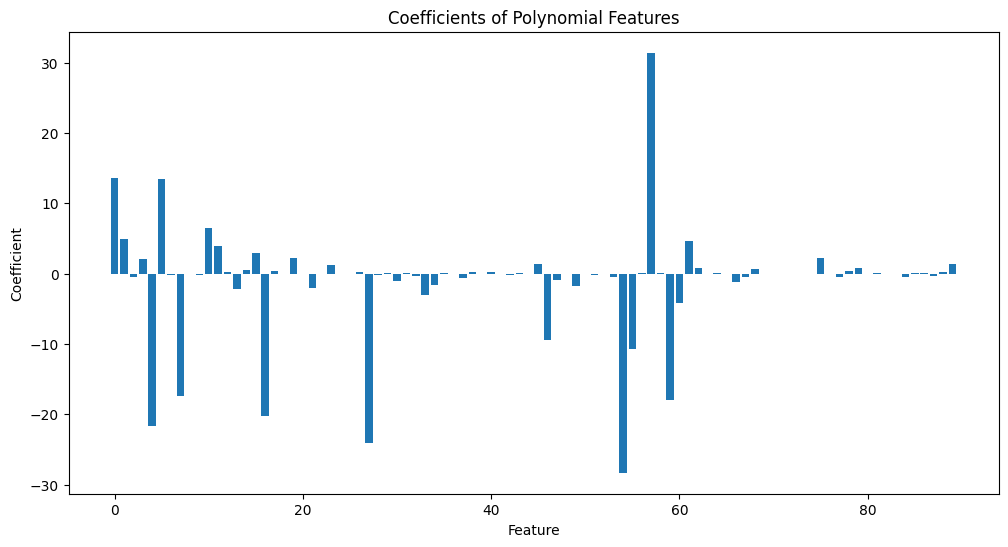

In [103]:
coefficients = linear_regressor.coef_
print(coefficients)

plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(coefficients)), coefficients)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Coefficients of Polynomial Features')
plt.show()

Get the score value of sklearn regressor on train dataset</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)



In [104]:
# TODO: Calculate R² score and MSE on the training dataset
y_train_pred = linear_regressor.predict(X_train)
l_r2_train = r2_score(y_train, y_train_pred)
l_mse_train = mean_squared_error(y_train, y_train_pred)

print("R² score on training set:", l_r2_train)
print("Mean Squared Error on training set:", l_mse_train)

R² score on training set: 0.9233615957926449
Mean Squared Error on training set: 6.65783903781899


Predict the value of "y" for each "x" belonging to the "testing" set

In [105]:
y_test_pred = linear_regressor.predict(X_test)
l_r2_test = r2_score(y_test, y_test_pred)
l_mse_test = mean_squared_error(y_test, y_test_pred)

print("R² score on testing set:", l_r2_test)
print("Mean Squared Error on testing set:", l_mse_test)

R² score on testing set: 0.752882288444152
Mean Squared Error on testing set: 18.122076674311796


# Lasso Regularization(L1)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [109]:
# TODO: Use Lasso from sklearn library
lasso_regressor = Lasso(alpha=0.5)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.972e+03, tolerance: 3.510e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5)

Get the coefficients of the variables and visualize it.

[-0.00000000e+00  0.00000000e+00 -8.62972979e-02  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -4.01861933e-02  0.00000000e+00
 -2.97695035e-02 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.55649395e-03  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.97177394e-03 -0.00000000e+00  3.37647439e-03
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -2.61417751e-03
 -2.77980693e-02 -0.00000000e+00 -0.00000000e+00  1.06210247e-03
 -0.00000000e+00 -7.75336556e-05 -6.83887625e-02  5.76609091e-02
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -8.90550446e-02
 -9.41194652e-03  0.00000000e+00  4.31869649e-03 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -4.59468372e-02  0.00000000e+00 -3.13277827e-02 -0.00000000e+00
  0.00000000e+00  0.00000

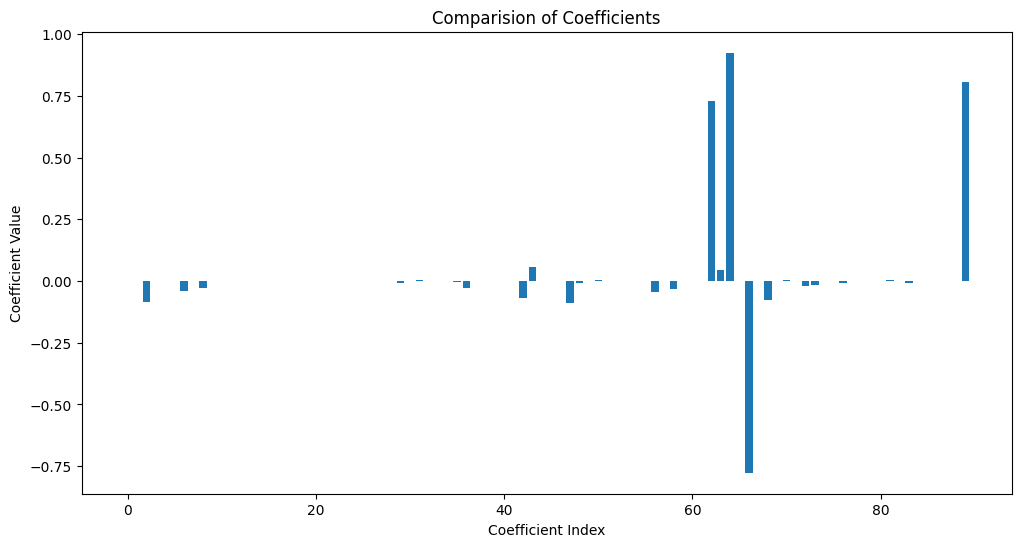

In [110]:
lasso_coefficients = lasso_regressor.coef_
print(lasso_coefficients)

plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(lasso_coefficients)), lasso_coefficients)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Comparision of Coefficients')
plt.show()


1- What observations can you make about the weight distribution when applying L1 regularization?

2- How do different values of the regularization parameter (alpha) affect the sparsity of the model coefficients?

    Your Answer Goes here.
    1: When I applyed L1 regularization on a model, one observation is that it tends to encourage sparsity in the weight distribution. This means that it drives many of the weights towards zero, effectively removing features that are less important for prediction.\n Also, L1 regularization can help in feature selection by automatically selecting the most relevant features for the model while discarding the less important ones.

    2: alpha in L1 regularization controls the strength of regularization.
    I mean Higher values of alpha lead to stronger regularization, which tends to increase the sparsity of the model coefficients. In other words, as alpha increases, more weights are driven towards zero, resulting in a sparser model with fewer non-zero coefficients. Also lower values of alpha lead to weaker regularization, allowing more coefficients to retain non-zero values, potentially leading to a denser model with less sparsity.





Get the score value on train *dataset*


In [111]:
# TODO: Calculate R² score and MSE on the training dataset
y_train_pred = lasso_regressor.predict(X_train)
lr_r2_train = r2_score(y_train, y_train_pred)
lr_mse_train = mean_squared_error(y_train, y_train_pred)

print("R² score on training set:", lr_r2_train)
print("Mean Squared Error on training set:", lr_mse_train)

R² score on training set: 0.8425272936430721
Mean Squared Error on training set: 13.680190012014142


Predict the value of "y" for each "x" belonging to the "testing" set

In [112]:
y_test_pred = lasso_regressor.predict(X_test)
lr_r2_test = r2_score(y_test, y_test_pred)
lr_mse_test = mean_squared_error(y_test, y_test_pred)

print("R² score on testing set:", lr_r2_test)
print("Mean Squared Error on testing set:", lr_mse_test)

R² score on testing set: 0.7900174924614984
Mean Squared Error on testing set: 15.398811675289354


# Ridge Regularization(L2)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [113]:
# TODO: Use Ridge from sklearn library
ridge_regressor = Ridge(alpha=10)
ridge_regressor.fit(X_train, y_train)

Ridge(alpha=10)

Get the coefficients of the variables and visualize it.

[ 1.91953498e-01 -4.52264322e-01 -6.73217772e-01  7.18806122e-02
  4.50850992e-02  3.09153338e+00 -4.12000642e-02 -8.45104213e-01
 -1.70797491e-02 -1.49803995e+00  1.14365479e+00  7.01723500e-01
  1.93811135e-01  7.28963427e-02  5.39998443e-01  1.55752899e+00
 -2.14843072e-01 -2.33360886e-01 -1.09912849e-02  1.36483573e+00
 -1.39703124e-02 -1.56548595e-01 -7.93131264e-02 -3.95075045e-02
 -1.64136752e-01 -1.76628327e-02  2.79743846e-01 -2.21091705e-01
  6.20369601e-04 -7.26799568e-03 -2.51744153e-01  5.64169861e-03
  9.32072387e-02 -2.12080923e-01 -6.68323509e-01  2.61400937e-02
 -1.32958227e-01 -3.97920453e-02  1.45438606e-01  3.59306004e-03
  1.67606806e-01 -4.31923149e-04 -1.58242123e-01  1.64788235e-01
 -7.36263132e-02  7.62379773e-01 -6.57068668e-01 -1.53356982e+00
 -1.27316191e-02 -8.78261865e-01  2.62497095e-03 -1.27214803e-01
  4.19296525e-01 -1.33508740e+00  6.67071123e-02  3.03734908e-01
 -5.75755787e-02 -3.10820999e-01 -1.52199782e-02 -1.00527868e+00
  2.80485331e-02  8.56885

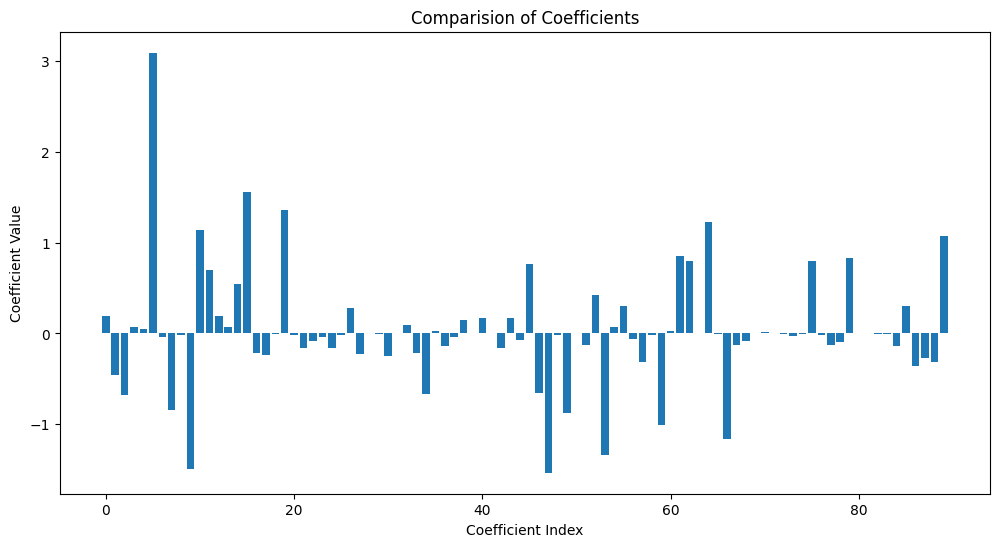

In [114]:
ridge_coefficients = ridge_regressor.coef_

print(ridge_coefficients)

plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(ridge_coefficients)), ridge_coefficients)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Comparision of Coefficients')
plt.show()

Compare the effect on coefficients between L1 and L2 regularization. What are
the key differences?

 How does the regularization parameter influence the magnitude of the coefficients in Ridge Regression?

        Your answer goes here
        Compare the effect on coefficients between L1 and L2 regularization. What are the key differences?  

        we can compare it in 3 different aspects:
        Sparsity: L1 regularization encourages sparsity by driving many coefficients to exactly zero. This makes it useful for feature selection, as it automatically selects the most relevant features by setting the coefficients of less important features to zero but L2 regularization does not lead to sparse solutions. It penalizes large coefficients but does not force them to be exactly zero. As a result, all coefficients are shrunk by a proportional amount, but they rarely become exactly zero.
        Magnitude of coefficients:
        L1 regularization can reduce the magnitude of coefficients for features that are less relevant to the prediction task. but L2 regularization reduces the magnitude of coefficients uniformly but does not force them to be zero.
        Stability: L1 regularization is more sensitive to outliers in the data due to its tendency to set coefficients to zero. L2 regularization:  more stable in the presence of outliers because it does not force coefficients to zero.
        How does the regularization parameter influence the magnitude of the coefficients in Ridge Regression?
        The regularization parameter controls the extent to which the coefficients are shrunk towards zero. A higher regularization parameter increases the penalty for large coefficients, leading to smaller magnitude coefficients as the optimization algorithm aggressively minimizes the combined loss and regularization term. Conversely, a lower regularization parameter reduces the penalty for large coefficients, allowing them to have larger magnitudes.




Get the score value on train *dataset*

In [115]:
# TODO: Calculate R² score and MSE on the training dataset
y_train_pred = ridge_regressor.predict(X_train)
rr_r2_train = r2_score(y_train, y_train_pred)
rr_mse_train = mean_squared_error(y_train, y_train_pred)

print("R² score on training set:", rr_r2_train)
print("Mean Squared Error on training set:", rr_mse_train)

R² score on training set: 0.9019496702370386
Mean Squared Error on training set: 8.5179658934524


Predict the value of "y" for each "x" belonging to the "testing" set



In [116]:
y_test_pred = ridge_regressor.predict(X_test)
rr_r2_test = r2_score(y_test, y_test_pred)
rr_mse_test = mean_squared_error(y_test, y_test_pred)

print("R² score on testing set:", rr_r2_test)
print("Mean Squared Error on testing set:", rr_mse_test)

R² score on testing set: 0.8032293946771332
Mean Squared Error on testing set: 14.429932903072608


# Summarization

Summarize the performance metrics (e.g., RMSE, R² score) of the basic regression model, Lasso regression, and Ridge regression in a table for easy comparison.(On both test and train data)</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)


In [117]:
# HINT: Use DataFrame tools
data = {
    'Model': ['Basic Regression', 'Lasso Regression', 'Ridge Regression'],
    'MSE(Test)': [l_mse_test, lr_mse_test, rr_mse_test],
    'MSE(Train)': [l_mse_train, lr_mse_train, rr_mse_train],
    'R² Score (Test)': [l_r2_test, lr_r2_test, rr_r2_test],
    'R² Score (Train)': [l_r2_train, lr_r2_train, rr_r2_train]
}

metrics_df = pd.DataFrame(data)
print(metrics_df)

              Model  MSE(Test)  MSE(Train)  R² Score (Test)  R² Score (Train)
0  Basic Regression  18.122077    6.657839         0.752882          0.923362
1  Lasso Regression  15.398812   13.680190         0.790017          0.842527
2  Ridge Regression  14.429933    8.517966         0.803229          0.901950


 *Which model performed best on the test data?</br>
Why the results on train data are different? </br>
Discuss why this might be the case.*

          your answer goes here.
          Which model performed best on the test data? As tou can see, Ridge regression is the best  model on test data.
          Why the results on train data are different? Becasue we add regularizations and regualrization are different from eac other. This makes results different.
          As we expected, Basic regression has the most accurate model on the train data but this model is overfitted to train data.
